#Entrenamiento

##Librerias para el entrenamiento

In [ ]:
import os
import sys
import time
import pandas as pd
import statistics

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from random import sample
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 

import seaborn

from sklearn import svm
from sklearn import metrics
from statistics import mean



##Carga de dataset

In [ ]:
dfc1= pd.read_excel("features_F_10.xlsx")
dfc2 =pd.read_excel("features_1O_20.xlsx")
dfc3 =pd.read_excel("features_F.xlsx")
dfc4 =pd.read_excel("features_1O.xlsx")

dfb1= pd.read_excel("features_EB_EC.xlsx")
dfb2= pd.read_excel("features_EB_ED_ESD.xlsx")
dfb3= pd.read_excel("features_EB_ED_TEB.xlsx")
dfb4= pd.read_excel("features_EB_ELL_EC.xlsx")
dfb5= pd.read_excel("features_EB_ESD.xlsx")

dfa1= pd.read_excel("features_RRd.xlsx")
dfa2 =pd.read_excel("features_RRe.xlsx")
dfa3 =pd.read_excel("features_RRc.xlsx")
dfa4 =pd.read_excel("features_RRab_4000.xlsx")

#Base de datos de las clases
dfa= pd.concat([dfa1,dfa2,dfa3,dfa4])      #RRl
dfb= pd.concat([dfb1,dfb2,dfb3,dfb4,dfb5]) #EB
dfc= pd.concat([dfc1,dfc2,dfc3,dfc4])      #CEPH

###==============================###
#Eliminamos los valores infinitos y nan
#dfa.replace([np.inf, -np.inf], np.nan, inplace=True)
#dfa.dropna(inplace=True)

#dfb.replace([np.inf, -np.inf], np.nan, inplace=True)
#dfb.dropna(inplace=True)

#dfc.replace([np.inf, -np.inf], np.nan, inplace=True)
#dfc.dropna(inplace=True)

###==============================###
#Escogemos el 80% de cada clase para entrenar y el 20% para test
train_random , test_random = train_test_split(pd.concat([dfa,dfb,dfc]), test_size=0.2, random_state=42)

labels1_random= train_random[['clase']]
train_random = train_random.drop(columns=['clase','oid',"GP_DRW_tau_r","GP_DRW_tau_b",'SF_ML_gamma_b',"SF_ML_amplitude_b","ExcessVar_b","Autocor_length_b","AndersonDarling_b","SF_ML_gamma_r","SF_ML_amplitude_r","ExcessVar_r","PairSlopeTrend_r","AndersonDarling_r","delta_period_r","MHPS_PN_flag_b","MHPS_PN_flag_r"])

labels2_random= test_random[['clase']]
test_random = test_random.drop(columns=['clase','oid',"GP_DRW_tau_r","GP_DRW_tau_b",'SF_ML_gamma_b',"SF_ML_amplitude_b","ExcessVar_b","Autocor_length_b","AndersonDarling_b","SF_ML_gamma_r","SF_ML_amplitude_r","ExcessVar_r","PairSlopeTrend_r","AndersonDarling_r","delta_period_r","MHPS_PN_flag_b","MHPS_PN_flag_r"])


###Balance de datos


In [ ]:
print(labels1_random.value_counts())

clase
0        6904
1        3528
2        2198
dtype: int64


clase
0        2198
1        2198
2        2198
dtype: int64


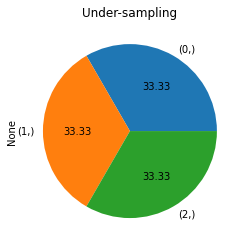

In [ ]:
###==============================### UnderSampling
rus = RandomUnderSampler(sampling_strategy="not minority") 
train_rus, label_rus = rus.fit_resample(train_random, labels1_random)

ax = label_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

print(label_rus.value_counts())

clase
0        6904
1        6904
2        6904
dtype: int64


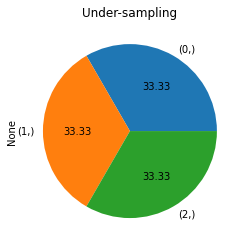

In [ ]:
###==============================### OverSampling
ros = RandomOverSampler(sampling_strategy="not majority") 
train_ros, label_ros = ros.fit_resample(train_random, labels1_random)

ax = label_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

print(label_ros.value_counts())

## Random Forest

In [ ]:
#RF desbalanceado
conf_mat_desva= []
acc_desva=[]
tiempo_desva =[]
for i in range(5):
    t1=time.process_time() 
    bosque_desva = BalancedRandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               oob_score=True)
    bosque_desva.fit(train_random.values , np.ravel(labels1_random.values))
    t2=time.process_time()
    CM = confusion_matrix(labels2_random.values, bosque_desva.predict(test_random.values),normalize='true')

    tiempo_desva.append(t2-t1)
    conf_mat_desva.append(CM)
    acc_desva.append(bosque_desva.score(test_random.values , labels2_random.values)) 

In [ ]:
print(f'Accuracy: {statistics.mean(acc_desva)} \u00B1 {statistics.pstdev(acc_desva)}')
print(f'Tiempo: {statistics.mean(tiempo_desva)} \u00B1 {statistics.pstdev(tiempo_desva)} [s]')

Accuracy: 0.8739075364154528 ± 0.002056071321184013
Tiempo: 7.381167422399995 ± 0.858253971397101 [s]


In [ ]:
#RF con UnderSampling
conf_mat_rus= []
acc_rus=[]
tiempo_rus =[]
for i in range(5):
    t1=time.process_time() 
    bosque_rus = BalancedRandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               oob_score=True)
    bosque_rus.fit(train_rus.values , np.ravel(label_rus.values))
    t2=time.process_time()
    CM = confusion_matrix(labels2_random.values, bosque_rus.predict(test_random.values),normalize='true')

    tiempo_rus.append(t2-t1)
    conf_mat_rus.append(CM)
    acc_rus.append(bosque_rus.score(test_random.values , labels2_random.values)) 

In [ ]:
print(f'Accuracy: {statistics.mean(acc_rus)} \u00B1 {statistics.pstdev(acc_rus)}')
print(f'Tiempo: {statistics.mean(tiempo_rus)} \u00B1 {statistics.pstdev(tiempo_rus)} [s]')

Accuracy: 0.8700443318556048 ± 0.00302137059958876
Tiempo: 6.2970929786 ± 0.03279342541320329 [s]


In [ ]:
#RF con OverSampling
conf_mat_ros= []
acc_ros=[]
tiempo_ros =[]
for i in range(5):
    t1=time.process_time() 
    bosque_ros = BalancedRandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               oob_score=True)
    bosque_ros.fit(train_ros.values , np.ravel(label_ros.values))
    t2=time.process_time() 
    CM = confusion_matrix(labels2_random.values, bosque_ros.predict(test_random.values),normalize='true')

    tiempo_ros.append(t2-t1)
    conf_mat_ros.append(CM)
    acc_ros.append(bosque_ros.score(test_random.values , labels2_random.values))   

In [ ]:
print(f'Accuracy: {statistics.mean(acc_ros)} \u00B1 {statistics.pstdev(acc_ros)}')
print(f'Tiempo: {statistics.mean(tiempo_ros)} \u00B1 {statistics.pstdev(tiempo_ros)} [s]')

Accuracy: 0.8906903103229892 ± 0.0027195580181866674
Tiempo: 21.56138148099999 ± 0.5370102316599205 [s]


In [ ]:
#Funcion que retorna el arreglo de matriz de confusion promedio y con desviacion estandar.

def matrices(conf_mat): 
    #==============PROMEDIO CM ==============#
    suma = conf_mat[0]-conf_mat[0]
    for i in range(5):
      suma= suma + conf_mat[i]
    promedio = suma/5

    #==============DESVIACION CM==============#
    suma2= conf_mat[0]-conf_mat[0]
    desv= []

    for i in range(5):
      vac= conf_mat[0]-conf_mat[0]
      for m in range(3):
        for n in range(3):
          vac[m][n] = (conf_mat[i][m][n] - promedio[m][n])**2
      desv.append(vac)

    for i in range(5):
      suma2= suma2 + desv[i]
    promedio2 = suma2/5

    for m in range(3):
      for n in range(3):
        promedio2[m][n] = promedio2[m][n]**0.5
    #====================================#
    CM_DESV = [["", "", ""        ],
          ["", "", ""   ],
          ["", "", ""   ]]
    for m in range(3):
      for n in range(3):
        CM_DESV[m][n] = str(f'{round(promedio[m][n]*100,1)} \u00B1 {round(promedio2[m][0]*100,1)} %')

    return (promedio, CM_DESV)

##Resultados


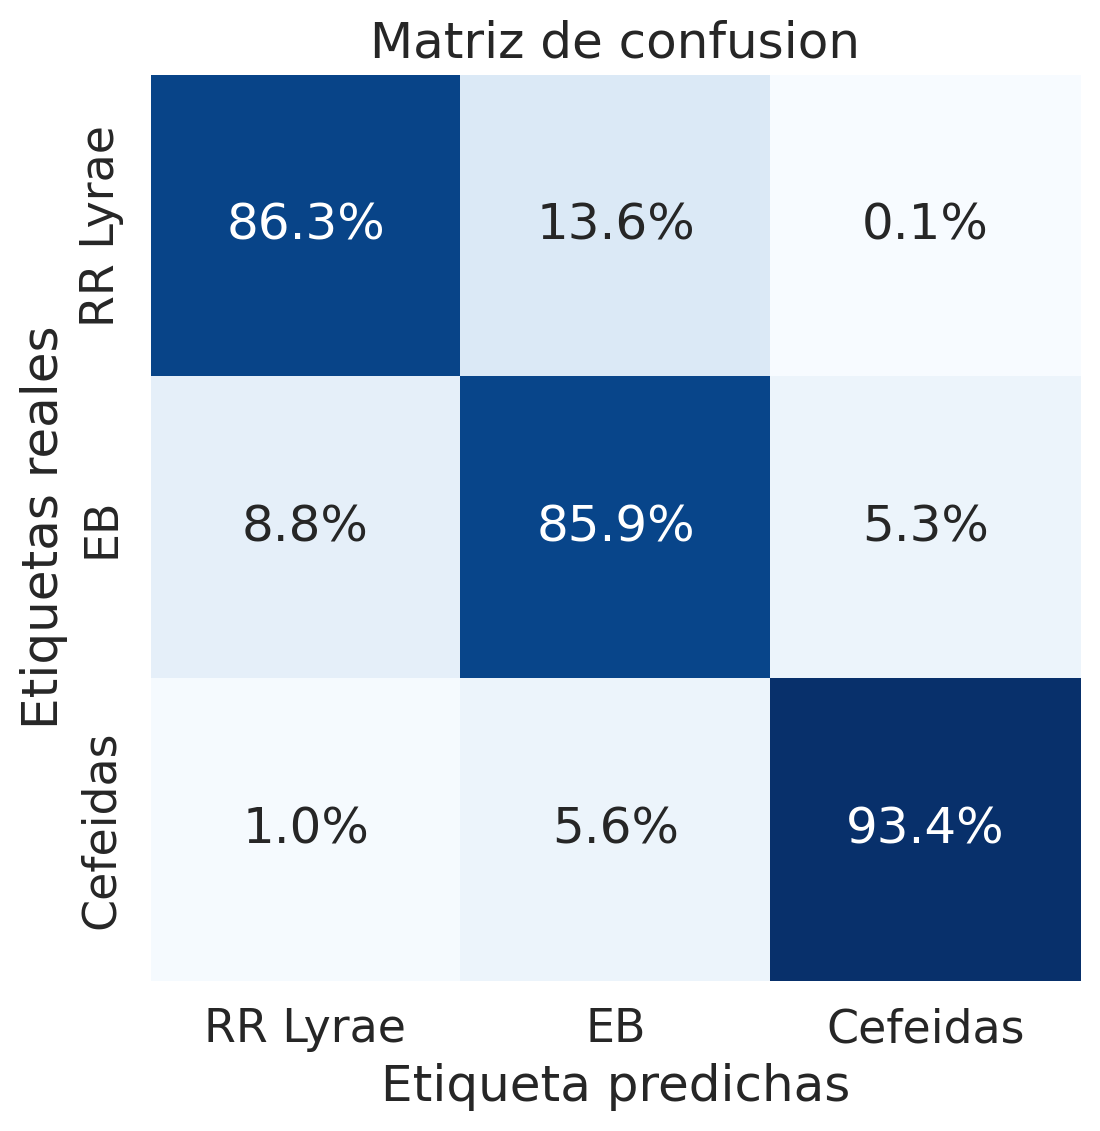

In [ ]:
#==============CM Desbalanceado ==============#
CM_desva = matrices(conf_mat_desva)[0]

fig = plt.figure(figsize=(6, 6),dpi=200)
seaborn.set(font_scale=1.5)
ax=seaborn.heatmap(CM_desva,annot=True, fmt='.1%',cmap='Blues' ,cbar=False)
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()

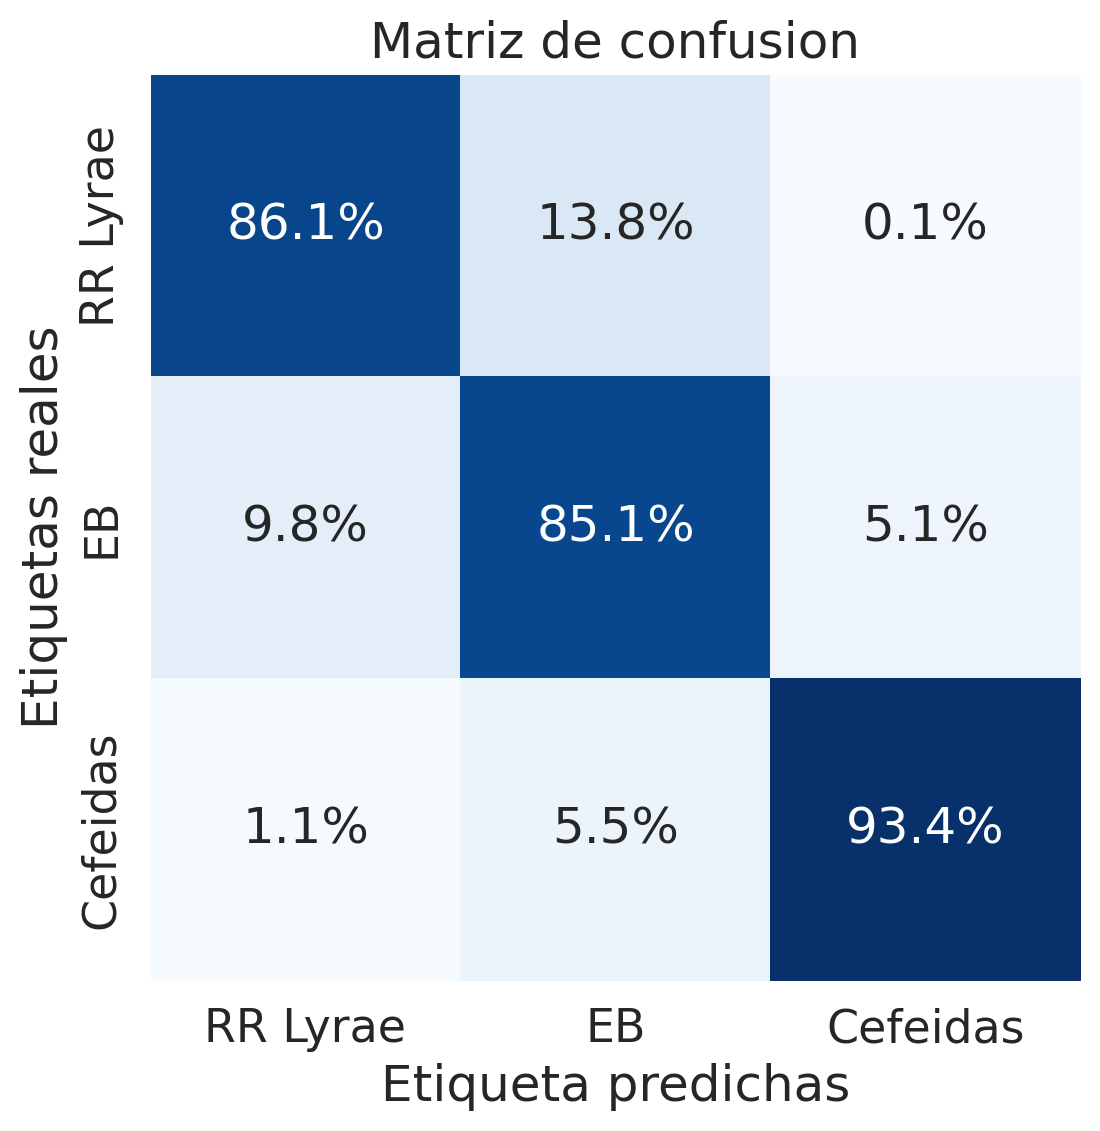

In [ ]:
#==============CM UnderSampling ==============#
CM_rus = matrices(conf_mat_rus)[0]

fig = plt.figure(figsize=(6, 6),dpi=200)
seaborn.set(font_scale=1.5)
ax=seaborn.heatmap(CM_rus,annot=True, fmt='.1%',cmap='Blues' ,cbar=False)
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()

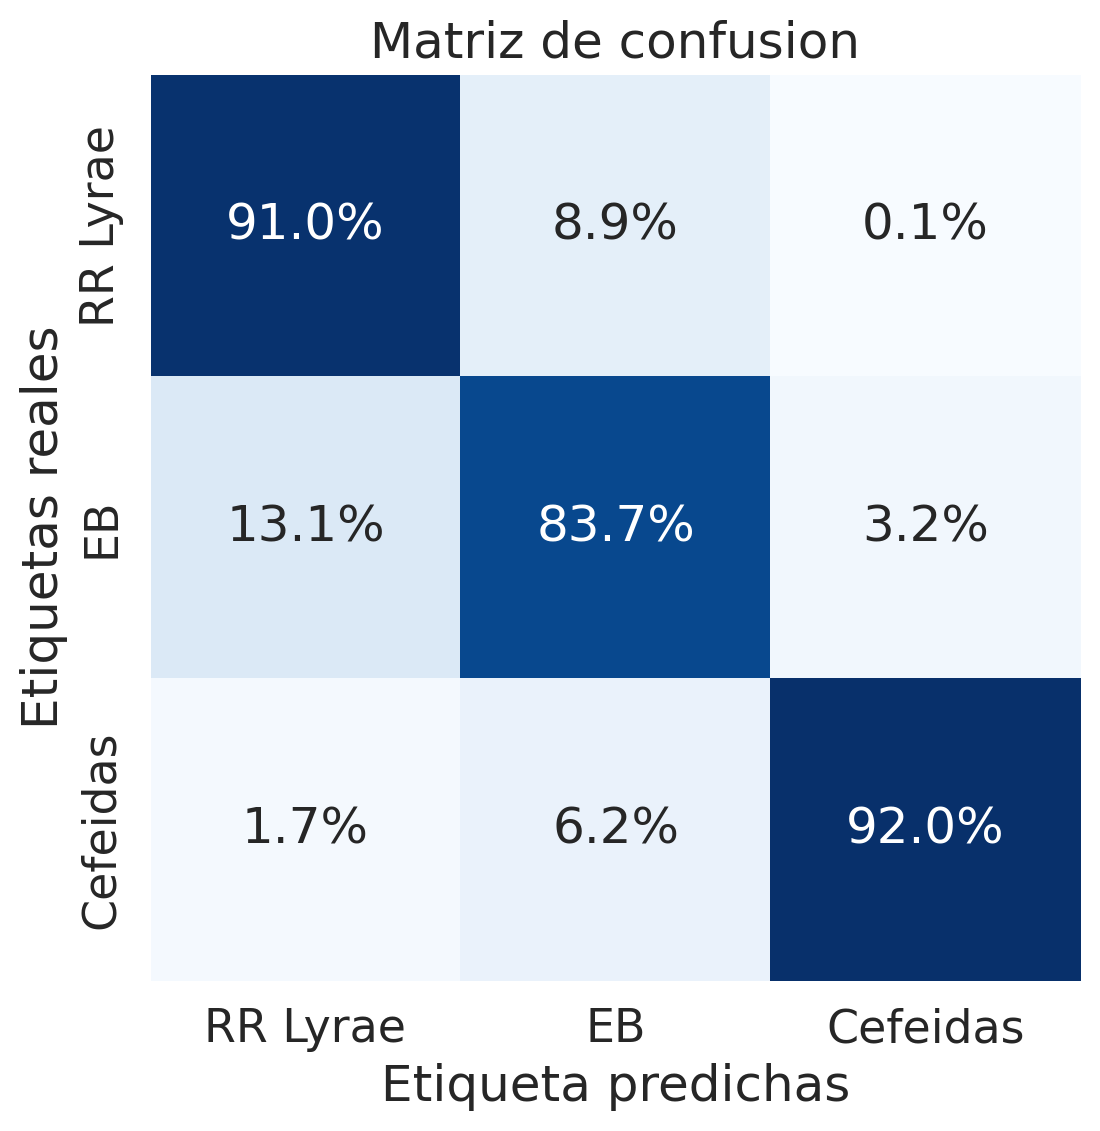

In [ ]:
#==============CM OverSampling ==============#
CM_ros = matrices(conf_mat_ros)[0]

fig = plt.figure(figsize=(6, 6),dpi=200)
seaborn.set(font_scale=1.5)

ax=seaborn.heatmap(CM_ros,annot=True, fmt='.1%',cmap='Blues' ,cbar=False)
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()

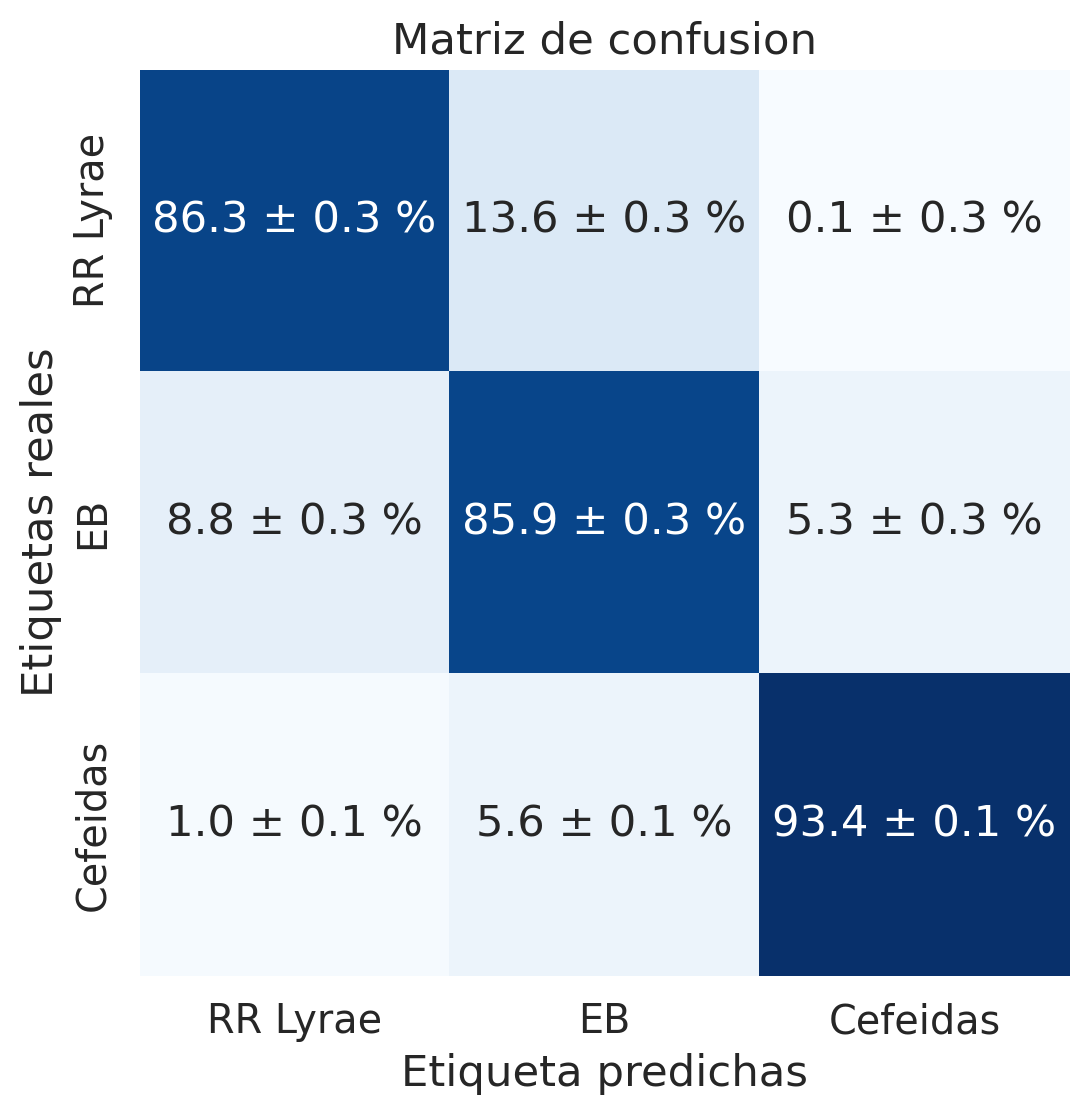

In [ ]:
#==============CM con desviacion Desbalanceado ==============#

CM_desv_desva = matrices(conf_mat_desva)[1]

fig = plt.figure(figsize=(6, 6),dpi=200)
seaborn.set(font_scale=1.3)

ax=seaborn.heatmap(CM_desva, annot=CM_desv_desva, cmap='Blues' ,cbar=False, fmt="")
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()

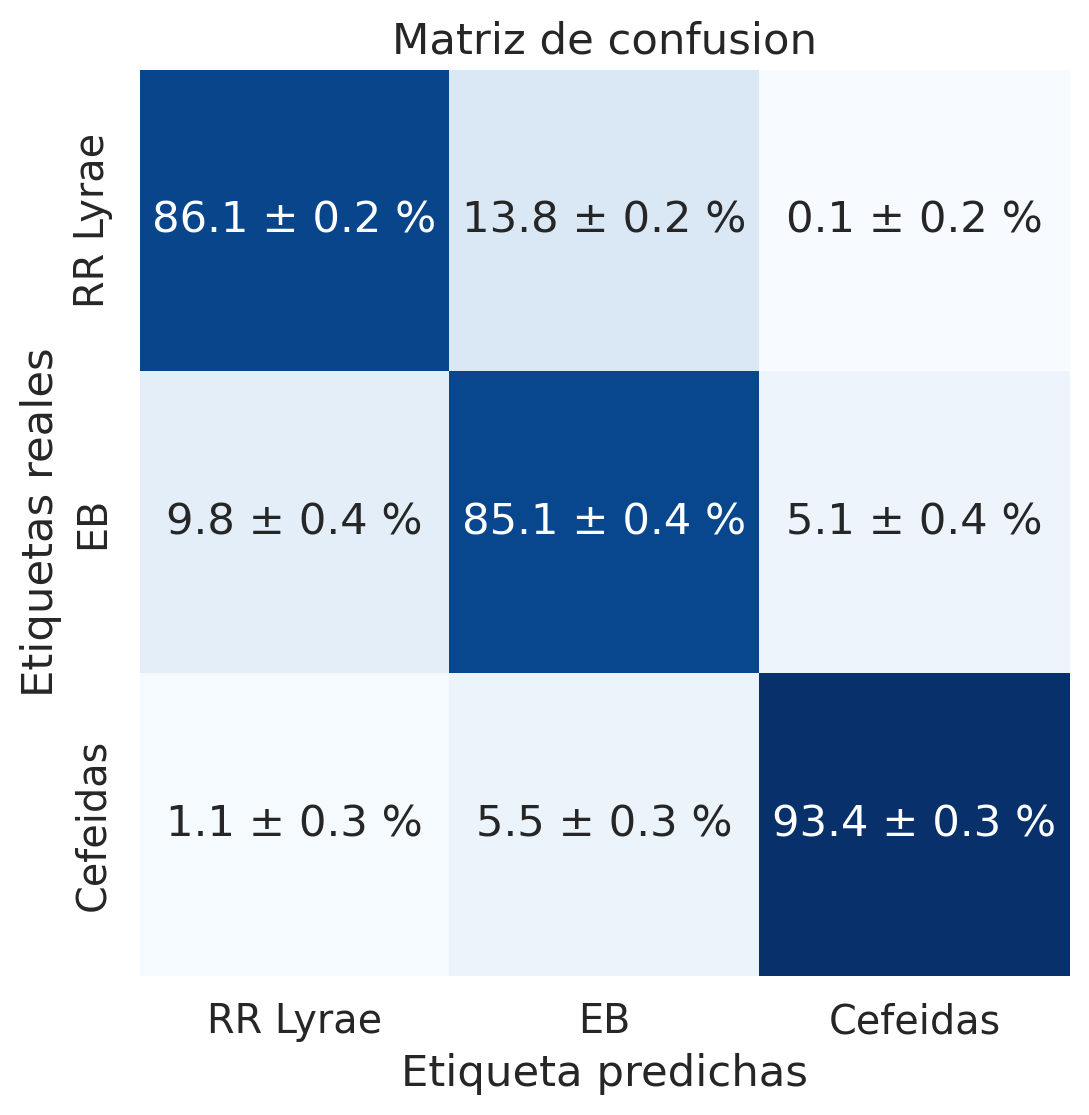

In [ ]:
#==============CM con desviacion UnderSampling ==============#

CM_desv_rus = matrices(conf_mat_rus)[1]

fig = plt.figure(figsize=(6, 6),dpi=200)

ax=seaborn.heatmap(CM_rus, annot=CM_desv_rus, cmap='Blues' ,cbar=False, fmt="")
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()

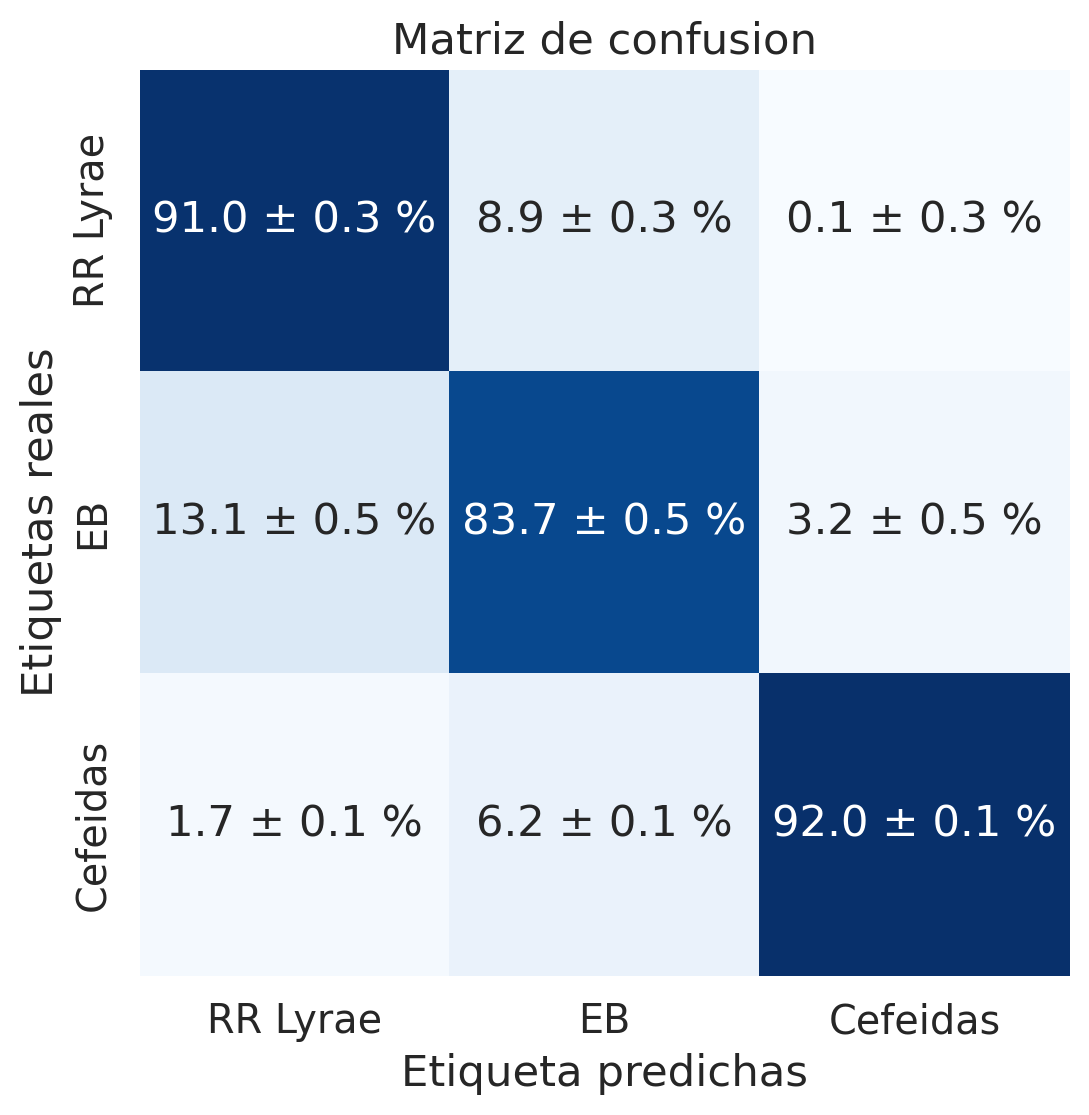

In [ ]:
#==============CM con desviacion OverSampling ==============#

CM_desv_ros = matrices(conf_mat_ros)[1]

fig = plt.figure(figsize=(6, 6),dpi=200)

ax=seaborn.heatmap(CM_ros, annot=CM_desv_ros, cmap='Blues' ,cbar=False, fmt="")
ax.set_ylabel('Etiquetas reales')
ax.set_xlabel('Etiqueta predichas')
ax.set_title('Matriz de confusion')

ax.yaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])
ax.xaxis.set_ticklabels(['RR Lyrae','EB',"Cefeidas"])

plt.show()